In [27]:
import pandas as pd
import numpy as np
import altair as alt

import matplotlib.pyplot as plt
import seaborn as sns

from selenium import webdriver
executable_path='/opt/homebrew/bin/geckodriver'
driver = webdriver.Firefox(executable_path=executable_path) 

In [28]:
full_df = pd.read_csv('../data/processed/full_df.csv')
train_df = pd.read_csv('../data/processed/train_df.csv')

In [23]:
# Histogram Plot
histogram_plot = alt.Chart(train_df, title = "Target variable histogram").mark_bar().encode(
                    x = alt.X("total_cup_points:Q", bin=True),
                    y ='count()',
                    )

histogram_plot.save('../reports/images/target_histogram.png', webdriver=driver)
histogram_plot

alt.Chart(...)

In [29]:
splom = alt.Chart(train_df, title="Explanatory variables pair plot").mark_point(opacity=0.3).encode(
            x=alt.X(alt.repeat("column"), type='quantitative', scale = alt.Scale(zero=False)),
            y=alt.Y(alt.repeat("row"), type='quantitative', scale = alt.Scale(zero=False)),
            ).properties(
            width=200,
            height=200
            ).repeat(
            row=['total_cup_points'],
            column=['moisture', 'category_one_defects',
                    'quakers', 'category_two_defects',
                    'altitude_mean_meters']
            )
splom.save('../reports/images/target_histogram.png', webdriver=driver)
splom

alt.RepeatChart(...)

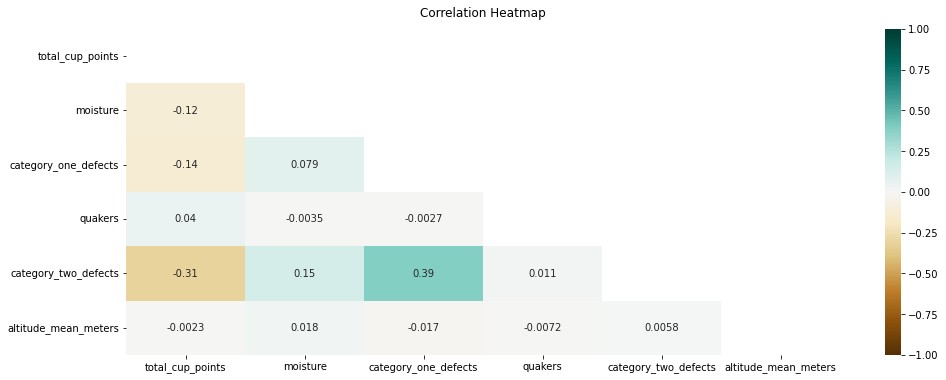

In [30]:
# Correlation Plot
plt.figure(figsize=(16, 6))

correlation_matrix = train_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

heatmap = sns.heatmap(correlation_matrix, mask = mask,
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

fig = heatmap.get_figure()
fig.savefig('../reports/images/correlation_matrix_heatmap.png')

#plt.savefig('../reports/images/correlation_matrix_heatmap.png')

Correlation Matrix Plotted


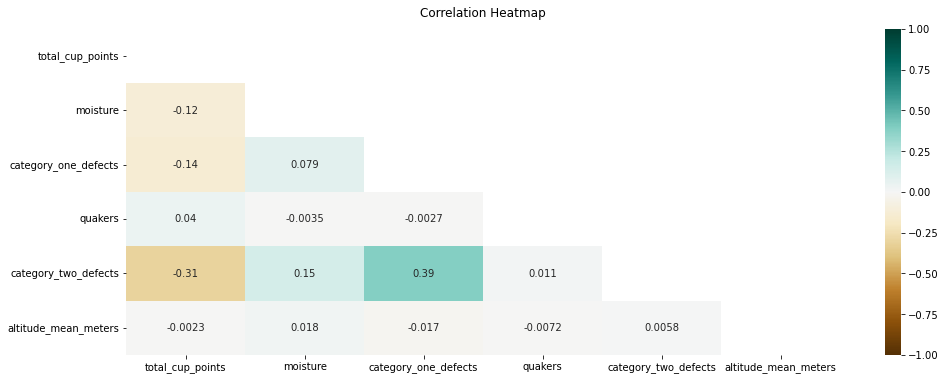

In [61]:
import os

import pandas as pd
import numpy as np
import altair as alt

import matplotlib.pyplot as plt
import seaborn as sns

from docopt import docopt

#opt = docopt(__doc__)


def plot_target_histogram(dataframe:pd.DataFrame, target_feature:str,
                          output_dir:str="../reports/images/"):
    # Histogram Plot of Target Variable
    histogram_plot = alt.Chart(train_df, title = "Target variable histogram").mark_bar().encode(
                        x = alt.X("{target_feature}:Q", bin=True),
                        y ='count()',
                        )

    histogram_plot.save(output_dir+'target_histogram.html')
    
    
def plot_correlation_matrix(dataframe:pd.DataFrame,
                            output_dir:str="../reports/images/"):
    
    # Correlation Plot - Diagonal Removed
    plt.figure(figsize=(16, 6))

    correlation_matrix = train_df.corr()

    mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

    heatmap = sns.heatmap(correlation_matrix, mask = mask,
                          vmin=-1, vmax=1, annot=True, cmap='BrBG')

    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

    fig = heatmap.get_figure()
    fig.savefig(output_dir+'correlation_matrix_heatmap.png')
    
    return print("Correlation Matrix Plotted")

def plot_pairwise(dataframe:pd.DataFrame, target_feature:str,
                  output_dir:str="../reports/images/"):
    
    splom = alt.Chart(train_df, title="Explanatory variables pair plot").mark_point(opacity=0.3).encode(
        x=alt.X(alt.repeat("column"), type='quantitative', scale = alt.Scale(zero=False)),
        y=alt.Y(alt.repeat("row"), type='quantitative', scale = alt.Scale(zero=False)),
        ).properties(
        width=200,
        height=200
        ).repeat(
        row=['{target_feature}'],
        column=['moisture', 'category_one_defects',
                'quakers', 'category_two_defects',
                'altitude_mean_meters'])
    
    splom.save(output_dir+'target_histogram.html')
    
    

def plot_visualisations():
    
    input_dir = "../data/processed/"
    output_dir = "../reports/images/"
    
    # Read Dataframes
    train_df = pd.read_csv(input_dir + 'train_df.csv')
    
    plot_target_histogram(train_df, "total_cup_points", output_dir)
    plot_pairwise(train_df, "total_cup_points", output_dir)
    plot_correlation_matrix(train_df, output_dir)
    
       

    
    
plot_visualisations()
